In [1]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline

In [2]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer

In [3]:
dev = qml.device("strawberryfields.fock", wires=1, cutoff_dim=10)

In [4]:
def layer(v):
    # Matrix multiplication of input layer
    qml.Rotation(v[0], wires=0)
    qml.Squeezing(v[1], 0.0, wires=0)
    qml.Rotation(v[2], wires=0)

    # Bias
    qml.Displacement(v[3], 0.0, wires=0)

    # Element-wise nonlinear transformation
    qml.Kerr(v[4], wires=0)

In [5]:
@qml.qnode(dev)
def quantum_neural_net(var, x=None):
    # Encode input x into quantum state
    qml.Displacement(x, 0.0, wires=0)

    # "layer" subcircuits
    for v in var:
        layer(v)

    return qml.expval(qml.X(0))

In [6]:
def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss

In [7]:
def cost(var, features, labels):
    preds = [quantum_neural_net(var, x=x) for x in features]
    return square_loss(labels, preds)

In [8]:
data = np.loadtxt("sine.txt")
X = data[:, 0]
Y = data[:, 1]

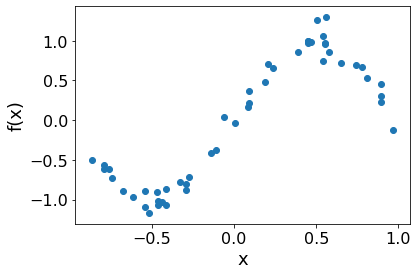

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X, Y)
plt.xlabel("x", fontsize=18)
plt.ylabel("f(x)", fontsize=18)
plt.tick_params(axis="both", which="major", labelsize=16)
plt.tick_params(axis="both", which="minor", labelsize=16)
plt.show()

In [10]:
np.random.seed(0)
num_layers = 4
var_init = 0.05 * np.random.randn(num_layers, 5)
print(var_init)

[[ 0.08820262  0.02000786  0.0489369   0.11204466  0.0933779 ]
 [-0.04886389  0.04750442 -0.00756786 -0.00516094  0.02052993]
 [ 0.00720218  0.07271368  0.03805189  0.00608375  0.02219316]
 [ 0.01668372  0.07470395 -0.01025791  0.01565339 -0.04270479]]


In [11]:
opt = AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

var = var_init
for it in range(500):
    var = opt.step(lambda v: cost(v, X, Y), var)
    print("Iter: {:5d} | Cost: {:0.7f} ".format(it + 1, cost(var, X, Y)))

Iter:     1 | Cost: 0.2689702 
Iter:     2 | Cost: 0.2472125 
Iter:     3 | Cost: 0.2300139 
Iter:     4 | Cost: 0.2157100 
Iter:     5 | Cost: 0.2035455 
Iter:     6 | Cost: 0.1931103 
Iter:     7 | Cost: 0.1841536 
Iter:     8 | Cost: 0.1765061 
Iter:     9 | Cost: 0.1700410 
Iter:    10 | Cost: 0.1646527 
Iter:    11 | Cost: 0.1602444 
Iter:    12 | Cost: 0.1567201 
Iter:    13 | Cost: 0.1539806 
Iter:    14 | Cost: 0.1519220 
Iter:    15 | Cost: 0.1504356 
Iter:    16 | Cost: 0.1494099 
Iter:    17 | Cost: 0.1487330 
Iter:    18 | Cost: 0.1482962 
Iter:    19 | Cost: 0.1479980 
Iter:    20 | Cost: 0.1477470 
Iter:    21 | Cost: 0.1474655 
Iter:    22 | Cost: 0.1470914 
Iter:    23 | Cost: 0.1465799 
Iter:    24 | Cost: 0.1459034 
Iter:    25 | Cost: 0.1450506 
Iter:    26 | Cost: 0.1440251 
Iter:    27 | Cost: 0.1428427 
Iter:    28 | Cost: 0.1415282 
Iter:    29 | Cost: 0.1401125 
Iter:    30 | Cost: 0.1386296 
Iter:    31 | Cost: 0.1371132 
Iter:    32 | Cost: 0.1355946 
Iter:   

Iter:   266 | Cost: 0.0198737 
Iter:   267 | Cost: 0.0197740 
Iter:   268 | Cost: 0.0196757 
Iter:   269 | Cost: 0.0195787 
Iter:   270 | Cost: 0.0194831 
Iter:   271 | Cost: 0.0193889 
Iter:   272 | Cost: 0.0192959 
Iter:   273 | Cost: 0.0192043 
Iter:   274 | Cost: 0.0191140 
Iter:   275 | Cost: 0.0190249 
Iter:   276 | Cost: 0.0189371 
Iter:   277 | Cost: 0.0188505 
Iter:   278 | Cost: 0.0187651 
Iter:   279 | Cost: 0.0186810 
Iter:   280 | Cost: 0.0185980 
Iter:   281 | Cost: 0.0185163 
Iter:   282 | Cost: 0.0184356 
Iter:   283 | Cost: 0.0183561 
Iter:   284 | Cost: 0.0182777 
Iter:   285 | Cost: 0.0182004 
Iter:   286 | Cost: 0.0181242 
Iter:   287 | Cost: 0.0180491 
Iter:   288 | Cost: 0.0179750 
Iter:   289 | Cost: 0.0179020 
Iter:   290 | Cost: 0.0178299 
Iter:   291 | Cost: 0.0177589 
Iter:   292 | Cost: 0.0176888 
Iter:   293 | Cost: 0.0176197 
Iter:   294 | Cost: 0.0175515 
Iter:   295 | Cost: 0.0174843 
Iter:   296 | Cost: 0.0174180 
Iter:   297 | Cost: 0.0173525 
Iter:   

In [12]:
x_pred = np.linspace(-1, 1, 50)
predictions = [quantum_neural_net(var, x=x_) for x_ in x_pred]

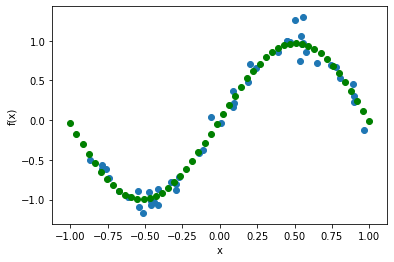

In [13]:
plt.figure()
plt.scatter(X, Y)
plt.scatter(x_pred, predictions, color="green")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

In [ ]:
variance = 1.0

plt.figure()
x_pred = np.linspace(-2, 2, 50)
for i in range(7):
    rnd_var = variance * np.random.randn(num_layers, 7)
    predictions = [quantum_neural_net(rnd_var, x=x_) for x_ in x_pred]
    plt.plot(x_pred, predictions, color="black")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.tick_params(axis="both", which="major")
plt.tick_params(axis="both", which="minor")
plt.show()

![](../demonstrations/quantum_neural_net/qnn_output_30_0.png)


